In [1]:
model = CustomProphet()
model.fit(df)
params = np.ones((47,))

def fin_diff(params):
    eps = 1e-6
    grad = np.zeros((47,))
    for i in range(47):
        params1 = params.copy()
        params2 = params.copy()
        params1[i] = params[i] + eps
        params2[i] = params[i] - eps
        grad[i] = (model._minus_log_posterior(params1)\
                - model._minus_log_posterior(params2)) / (2 * eps)
    return grad

gradient = model._gradient(params)
finite_difference = fin_diff(params)

are_close = np.allclose(gradient, finite_difference)

# If you need to inspect the differences
differences = gradient - finite_difference

# Print results
print("Are the gradients approximately equal?", are_close)
print("Differences:", differences)


NameError: name 'CustomProphet' is not defined

In [ ]:
params = model.get_parameters()
k, m, delta, beta = extract_params(params)
A = (model.t_scaled[:, None] > model.change_points) * 1
gamma = -model.change_points * delta
g = (k + det_dot(A, delta)) * model.t_scaled + (m + det_dot(A, gamma))

period = 365.25 / model.scale_period
x = fourier_components(model.t_scaled, period, 10)
s = np.dot(x, beta)

r = model.normalized_y - g - s
A.shape, r.shape, r[:, None].shape, model.t_scaled.shape, model.t_scaled[:, None].shape
#(np.sum(r[:, None] * model.t_scaled[:, None] * A, axis = 0)).shape
#-np.sum(r * model.t_scaled * A[:,], axis=0) / model.sigma_obs**2 + np.sign(delta) / model.tau

#A.shape, r.shape, model.t_scaled.shape
#sum(-np.sum(r[:, None] * model.t_scaled[:, None] * A, axis=0)), -np.sum(r[:, None] * model.t_scaled[:, None] * A)

In [ ]:
model.change_points, model.t_scaled[100]

In [ ]:
model = CustomProphet()
model.fit(df, use_combined=True)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
forecast

In [ ]:
model = Prophet(weekly_seasonality=False, yearly_seasonality=True, daily_seasonality=False)
model.fit(df)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
forecast

#fig1 = model.plot(forecast)
#fig2 = model.plot_components(forecast)

In [1]:
from customProphet5 import *
from prophet import Prophet
import matplotlib.pyplot as plt
import psutil
import time
import pandas as pd
plt.style.use('ggplot')

df = pd.read_csv('peyton_manning.csv')

# Memory Tracker

def get_current_process_memory_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    return memory_info.rss  # Returning Resident Set Size (physical memory usage)

def run_function_and_get_memory(target_function, num_runs=5, sleep_time=1):
    memory_usages = []

    for _ in range(num_runs):
        # Run the target function
        target_function()
        
        # Wait for a bit to ensure the process memory usage is stable
        time.sleep(sleep_time)
        
        # Get the memory usage of the current process
        memory_usage = get_current_process_memory_usage()
        
        # Add to the list if memory usage is found
        if memory_usage:
            memory_usages.append(memory_usage)
        
    if memory_usages:
        memory_usage = np.array(memory_usages)
        m = memory_usage.mean()
        std = memory_usage.std()
        return m, std
    else:
        return None

/Users/adly/Desktop/customProphet/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


$\displaystyle g(t_i) = (k + a(t_i)\delta)t_i + (m + a(t_i)\gamma)\\
s(t_i) = \sum a_n \cos(\frac{2\pi t_i n}{P}) + b_n \sin(\frac{2\pi t_i n}{P}) = X(t_i) \beta\\
\mathcal{L}(k, m, \delta, \beta) = \frac{1}{2\sigma_{obs}^{2}} \sum_{i=1}^{T} \left[y_i - (g(t_i) + s(t_i))\right]^2 + \frac{1}{\tau}\sum |\delta_i| + \frac{1}{2\sigma^2}\sum \beta_i^2 + \frac{k^2}{2\sigma_k^2} + \frac{m^2}{2\sigma_m^2} \\ - \frac{1}{\sigma_{obs}^2} \sum [r_i t_i a(t_i)] + \frac{1}{\tau} \text{sgn} \ \delta$

## Finite Differences Peyton Manning

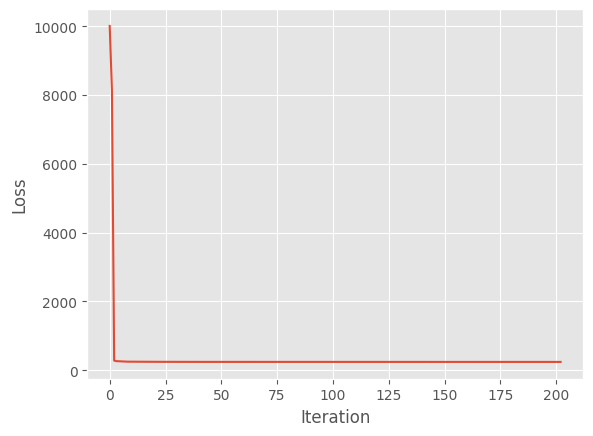

In [9]:
model = CustomProphet()
model.fit(df)

# Plot the loss over iterations
plt.plot(model.loss_over_iterations)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

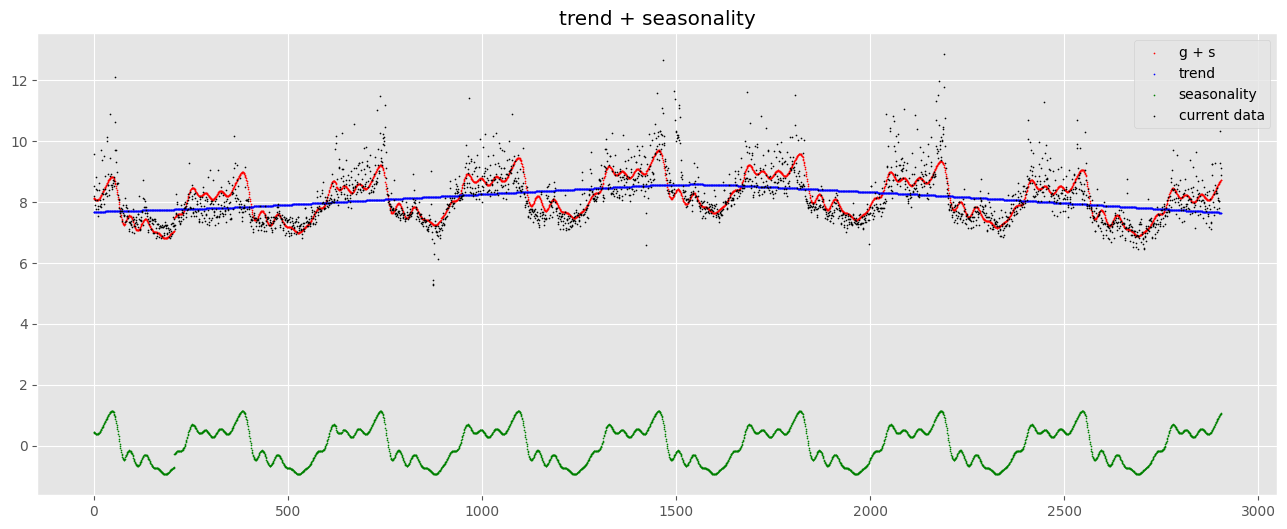

In [10]:
opt_params = model.get_parameters()
k, m, delta, beta = extract_params(opt_params)

# trend component
A = (model.t_scaled[:, None] > model.change_points) * 1
gamma = -model.change_points * delta
g = ((k + np.dot(A, delta)) * model.t_scaled + (m + np.dot(A, gamma))) * model.y_absmax
#g = ((k + det_dot(A, delta)) * model.t_scaled + (m + det_dot(A, gamma))) * model.y_absmax

x = fourier_components(model.t_scaled, 365.25 / model.scale_period, 10)
s = det_dot(x, beta) * model.y_absmax

plt.figure(figsize=(16, 6))
plt.title('trend + seasonality')
plt.scatter(np.arange(df.shape[0]), g+s, s=0.5, label='g + s', color='red')
plt.scatter(np.arange(df.shape[0]), g, s=0.5, label='trend', color='blue')
plt.scatter(np.arange(df.shape[0]), s, s=0.5, label='seasonality', color='green')
plt.scatter(np.arange(df.shape[0]), model.y, s=0.5, label='current data', color='black')
plt.legend()
plt.show()

In [11]:
model.opt, delta

(  message: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
   success: False
    status: 1
       fun: 241.01789359128247
         x: [ 7.687e-02  5.977e-01 ...  4.493e-04 -5.878e-03]
       nit: 203
       jac: [ 8.386e+00  2.183e+01 ...  1.563e-02  7.675e-02]
      nfev: 15168
      njev: 316
  hess_inv: <47x47 LbfgsInvHessProduct with dtype=float64>,
 array([ 1.38280098e-08,  1.68761002e-09,  1.76002933e-02,  5.68099206e-02,
         7.97389165e-04, -3.97005756e-08, -4.03102144e-06, -3.60970660e-07,
        -6.95475378e-06, -8.36286849e-08, -4.34231892e-06, -3.18554680e-08,
        -6.45411632e-06,  3.25675730e-08,  2.13930713e-05, -1.11901759e-01,
        -1.21428512e-01, -6.51464325e-02,  2.79062086e-06, -9.68123007e-07,
        -3.87519762e-06, -1.96979280e-07, -1.81783491e-02, -1.12580194e-02,
        -3.68339720e-04]))

## Analytic Gradient Peyton Manning

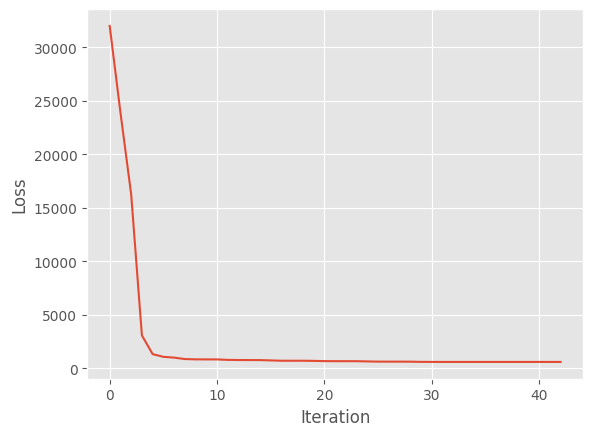

In [2]:
model = CustomProphet()
model.fit(df, analytic=True)

# Plot the loss over iterations
plt.plot(model.loss_over_iterations)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

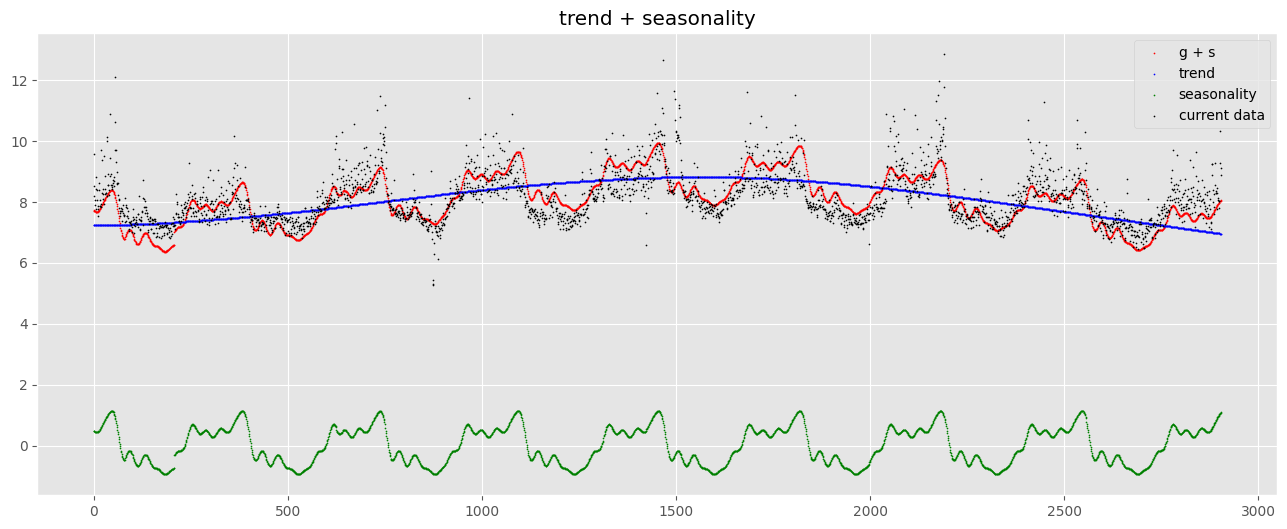

In [5]:
opt_params = model.get_parameters()
k, m, delta, beta = extract_params(opt_params)

# trend component
A = (model.t_scaled[:, None] > model.change_points) * 1
gamma = -model.change_points * delta
g = ((k + det_dot(A, delta)) * model.t_scaled + (m + det_dot(A, gamma))) * model.y_absmax

x = fourier_components(model.t_scaled, 365.25 / model.scale_period, 10)
s = det_dot(x, beta) * model.y_absmax

plt.figure(figsize=(16, 6))
plt.title('trend + seasonality')
plt.scatter(np.arange(df.shape[0]), g+s, s=0.5, label='g + s', color='red')
plt.scatter(np.arange(df.shape[0]), g, s=0.5, label='trend', color='blue')
plt.scatter(np.arange(df.shape[0]), s, s=0.5, label='seasonality', color='green')
plt.scatter(np.arange(df.shape[0]), model.y, s=0.5, label='current data', color='black')
plt.legend()
plt.show()

In [4]:
model.opt, delta

(  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
   success: True
    status: 0
       fun: 610.1300844241747
         x: [ 5.869e-02  5.631e-01 ...  4.098e-04 -6.143e-03]
       nit: 43
       jac: [-1.258e+03 -2.616e+03 ...  5.484e+00  1.939e+00]
      nfev: 433
      njev: 433
  hess_inv: <47x47 LbfgsInvHessProduct with dtype=float64>,
 array([ 0.05683235,  0.05348981,  0.04932526,  0.04386571,  0.03802644,
         0.02826843,  0.017094  ,  0.0029718 , -0.00953321, -0.01679584,
        -0.02954172, -0.0421503 , -0.04330263, -0.0481637 , -0.05444654,
        -0.05921346, -0.07625997, -0.07631763, -0.076556  , -0.06614421,
        -0.04880288, -0.03325578, -0.03145703, -0.03140784, -0.01675907]))

## Objective + Gradient Combined Peyton Manning

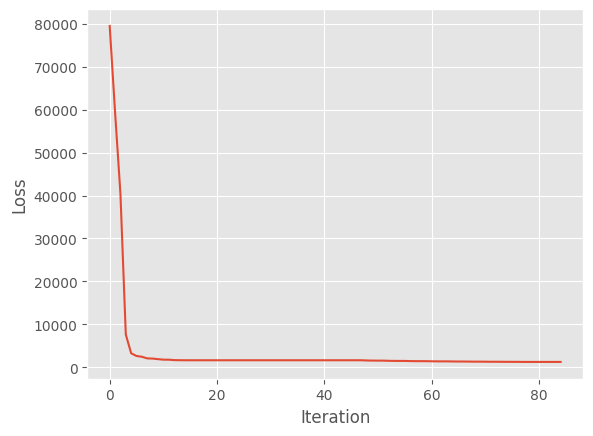

In [6]:
model = CustomProphet()
model.fit(df, use_combined=True)

# Plot the loss over iterations
plt.plot(model.loss_over_iterations)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

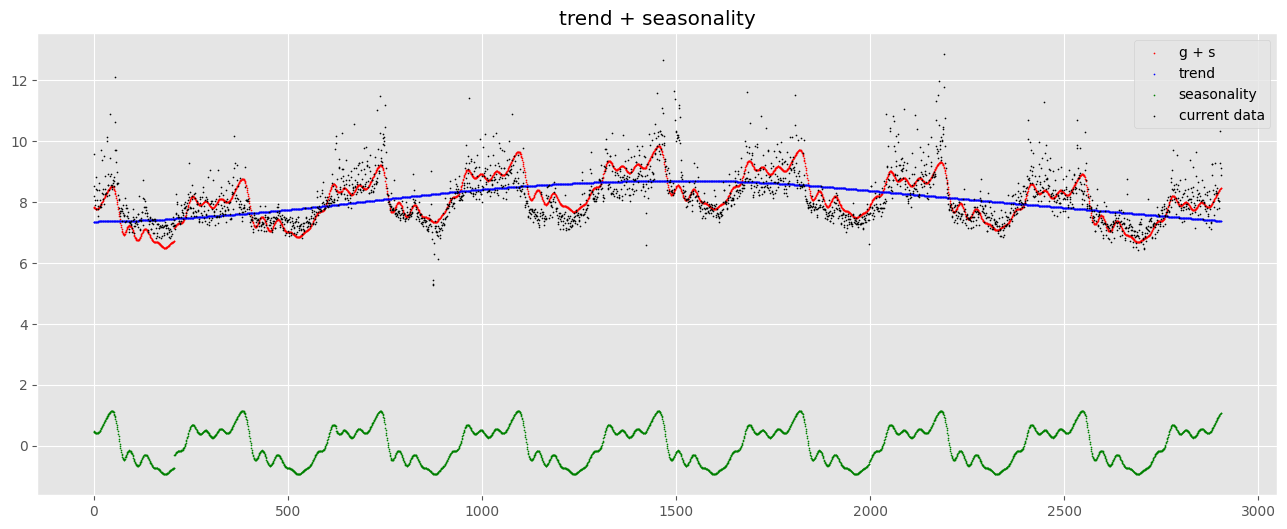

In [7]:
opt_params = model.get_parameters()
k, m, delta, beta = extract_params(opt_params)

# trend component
A = (model.t_scaled[:, None] > model.change_points) * 1
gamma = -model.change_points * delta
g = ((k + np.dot(A, delta)) * model.t_scaled + (m + np.dot(A, gamma))) * model.y_absmax
#g = ((k + det_dot(A, delta)) * model.t_scaled + (m + det_dot(A, gamma))) * model.y_absmax

x = fourier_components(model.t_scaled, 365.25 / model.scale_period, 10)
s = det_dot(x, beta) * model.y_absmax

plt.figure(figsize=(16, 6))
plt.title('trend + seasonality')
plt.scatter(np.arange(df.shape[0]), g+s, s=0.5, label='g + s', color='red')
plt.scatter(np.arange(df.shape[0]), g, s=0.5, label='trend', color='blue')
plt.scatter(np.arange(df.shape[0]), s, s=0.5, label='seasonality', color='green')
plt.scatter(np.arange(df.shape[0]), model.y, s=0.5, label='current data', color='black')
plt.legend()
plt.show()

In [8]:
model.opt, delta

(  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
   success: True
    status: 0
       fun: 1278.3685374267966
         x: [ 5.585e-02  5.728e-01 ...  5.070e-04 -6.036e-03]
       nit: 85
       jac: [-1.284e+03 -3.329e+03 ...  5.089e+00 -3.461e-01]
      nfev: 917
      njev: 917
  hess_inv: <47x47 LbfgsInvHessProduct with dtype=float64>,
 array([ 0.05400334,  0.04996612,  0.04525276,  0.03998934,  0.0346638 ,
         0.0236209 ,  0.01158245, -0.00401231, -0.01785903, -0.02393188,
        -0.03593496, -0.04739329, -0.04255686, -0.04376755, -0.04627463,
        -0.04718663, -0.06990883, -0.06686394, -0.06342491, -0.04547658,
        -0.02111865,  0.00039666,  0.00167746, -0.00251647,  0.01265835]))

## Fitting Time

In [ ]:
%%timeit -r 10 -n 10

# Finite differences
model = CustomProphet()
model.fit(df)

In [ ]:
%%timeit -r 10 -n 10

# Analytic
model = CustomProphet()
model.fit(df, analytic=True)

In [ ]:
%%timeit -r 10 -n 10

# Combined
model = CustomProphet()
model.fit(df, use_combined=True)

In [ ]:
%%timeit -r 10 -n 10

# Prophet
model = Prophet(weekly_seasonality=False, yearly_seasonality=True, daily_seasonality=False)
model.fit(df)

In [ ]:
360/205

## Memory Tracking

In [ ]:
# Finite differences
def prophetFit():
    model = CustomProphet()
    model.fit(df)

average_memory_usage, std = run_function_and_get_memory(prophetFit, num_runs=30, sleep_time=1)
if average_memory_usage:
    print(f"Average memory usage over 30 runs: {average_memory_usage / 1024**2} MB +/- {std / 1024**2} MB")
else:
    print("Failed to measure memory usage.")

In [ ]:
# Analytic
def prophetFit():
    model = CustomProphet()
    model.fit(df, analytic=True)
    
average_memory_usage, std = run_function_and_get_memory(prophetFit, num_runs=100, sleep_time=1)
if average_memory_usage:
    print(f"Average memory usage over 100 runs: {average_memory_usage / 1024**2} MB +/- {std / 1024**2} MB")
else:
    print("Failed to measure memory usage.")

In [ ]:
# Combined
def prophetFit():
    model = CustomProphet()
    model.fit(df, use_combined=True)
    
average_memory_usage, std = run_function_and_get_memory(prophetFit, num_runs=100, sleep_time=1)
if average_memory_usage:
    print(f"Average memory usage over 100 runs: {average_memory_usage / 1024**2} MB +/- {std / 1024**2} MB")
else:
    print("Failed to measure memory usage.")

In [ ]:
# Prophet
def prophetFit():
    model = Prophet(weekly_seasonality=False, yearly_seasonality=True, daily_seasonality=False)
    model.fit(df)

# Example usage:
average_memory_usage, std = run_function_and_get_memory(prophetFit, num_runs=100, sleep_time=1)
if average_memory_usage:
    print(f"Average memory usage over 30 runs: {average_memory_usage / 1024**2} MB +/- {std / 1024**2} MB")
else:
    print("Failed to measure memory usage.")

## Model Plot

In [ ]:
opt_params = model.get_parameters()
k, m, delta, beta = extract_params(opt_params)

# trend component
A = (model.t_scaled[:, None] > model.change_points) * 1
gamma = -model.change_points * delta
g = ((k + np.dot(A, delta)) * model.t_scaled + (m + np.dot(A, gamma))) * model.y_absmax
#g = ((k + det_dot(A, delta)) * model.t_scaled + (m + det_dot(A, gamma))) * model.y_absmax

x = fourier_components(model.t_scaled, 365.25 / model.scale_period, 10)
s = det_dot(x, beta) * model.y_absmax

plt.figure(figsize=(16, 6))
plt.title('trend + seasonality')
plt.scatter(np.arange(df.shape[0]), g+s, s=0.5, label='g + s', color='red')
plt.scatter(np.arange(df.shape[0]), g, s=0.5, label='trend', color='blue')
plt.scatter(np.arange(df.shape[0]), s, s=0.5, label='seasonality', color='green')
plt.scatter(np.arange(df.shape[0]), model.y, s=0.5, label='current data', color='black')
plt.legend()
plt.show()

In [ ]:
delta

In [ ]:
opt_params = model.get_parameters()
k, m, delta, beta = extract_params(opt_params)

# trend component
A = (model.t_scaled[:, None] > model.change_points) * 1
gamma = -model.change_points * delta
g = ((k + det_dot(A, delta)) * model.t_scaled + (m + det_dot(A, gamma))) * model.y_absmax

x = fourier_components(model.t_scaled, 365.25 / model.scale_period, 10)
s = det_dot(x, beta) * model.y_absmax

plt.figure(figsize=(16, 6))
plt.title('trend + seasonality')
plt.scatter(np.arange(df.shape[0]), g+s, s=0.5, label='g + s', color='red')
plt.scatter(np.arange(df.shape[0]), g, s=0.5, label='trend', color='blue')
plt.scatter(np.arange(df.shape[0]), s, s=0.5, label='seasonality', color='green')
plt.scatter(np.arange(df.shape[0]), model.y, s=0.5, label='current data', color='black')
plt.legend()
plt.show()

In [ ]:
opt_params = model.get_parameters()
k, m, delta, beta = extract_params(opt_params)

# trend component
A = (model.t_scaled[:, None] > model.change_points) * 1
gamma = -model.change_points * delta
g = ((k + det_dot(A, delta)) * model.t_scaled + (m + det_dot(A, gamma))) * model.y_absmax

x = fourier_components(model.t_scaled, 365.25 / model.scale_period, 10)
s = det_dot(x, beta) * model.y_absmax

plt.figure(figsize=(16, 6))
plt.title('trend + seasonality')
plt.scatter(np.arange(df.shape[0]), g+s, s=0.5, label='g + s', color='red')
plt.scatter(np.arange(df.shape[0]), g, s=0.5, label='trend', color='blue')
plt.scatter(np.arange(df.shape[0]), s, s=0.5, label='seasonality', color='green')
plt.scatter(np.arange(df.shape[0]), model.y, s=0.5, label='current data', color='black')
plt.legend()
plt.show()

In [ ]:
delta

In [ ]:
opt_params = model.get_parameters()
k, m, delta, beta = extract_params(opt_params)

# trend component
A = (model.t_scaled[:, None] > model.change_points) * 1
gamma = -model.change_points * delta
g = ((k + det_dot(A, delta)) * model.t_scaled + (m + det_dot(A, gamma))) * model.y_absmax

x = fourier_components(model.t_scaled, 365.25 / model.scale_period, 10)
s = det_dot(x, beta) * model.y_absmax

plt.figure(figsize=(16, 6))
plt.title('trend + seasonality')
plt.scatter(np.arange(df.shape[0]), g+s, s=0.5, label='g + s', color='red')
plt.scatter(np.arange(df.shape[0]), g, s=0.5, label='trend', color='blue')
plt.scatter(np.arange(df.shape[0]), s, s=0.5, label='seasonality', color='green')
plt.scatter(np.arange(df.shape[0]), model.y, s=0.5, label='current data', color='black')
plt.legend()
plt.show()

***
## VoLTE_ATT

In [ ]:
df = pd.read_csv('sample_data_2.csv')

CHANNEL = 84058 # channel to forecast

START_DATE = '2021/07/01 0:00'
END_DATE = '2021/07/07 23:00'

df['START_TIME'] = pd.to_datetime(df['START_TIME'], format='%Y/%m/%d %H:%M')

df.ffill(inplace=True) # fill missing values with previous values
df = df[df['eNodeB_ID'] == CHANNEL] # filter by eNodeB_ID=84058

# filter by date range
start_date = pd.to_datetime(START_DATE)
end_date = pd.to_datetime(END_DATE)
df = df[(df['START_TIME'] >= start_date) & (df['START_TIME'] <= end_date)]
df = df.loc[:, ['START_TIME', 'VoLTE_ATT']]

# create new columns 't' and 'y_scaled'
df['t'] = (df['START_TIME'] - df['START_TIME'].min()) / (df['START_TIME'].max() - df['START_TIME'].min())
df['y_scaled'] = df['VoLTE_ATT'] / df['VoLTE_ATT'].max()
df.rename(columns={'START_TIME': 'ds', 'VoLTE_ATT': 'y'}, inplace=True)

model = CustomProphet()
model.fit(df)

# Plot the loss over iterations
plt.plot(model.loss_over_iterations)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
opt_params = model.get_parameters()
k, m, delta, beta = extract_params(opt_params)

# trend component
A = (model.t_scaled[:, None] > np.array(model.change_points)) * 1
gamma = -model.change_points * delta
g = (k + det_dot(A, delta)) * model.t_scaled + (m + det_dot(A, gamma)) * model.y_absmax

x = fourier_components(model.t_scaled, 365.25 / model.scale_period, 10)
s = det_dot(x, beta) * model.y_absmax

plt.figure(figsize=(16, 6))
plt.title('trend + seasonality')
plt.scatter(np.arange(df.shape[0]), g+s, s=0.5, label='g + s', color='red')
plt.scatter(np.arange(df.shape[0]), model.y, s=0.5, label='current data', color='black')
plt.legend()
plt.show()